In [1]:
import warnings
warnings.filterwarnings('ignore')
# Ignorar los warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing
from sklearn.model_selection import GridSearchCV


In [3]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv("Baseplcascruzadas.csv",  sep=';', encoding='utf-8')

# Muestra las primeras filas del DataFrame para verificar la carga exitosa
df

,Placa,departamento,ciudad,servicio,SoloFecha,SoloHora,DiaSemana,FECHA_HORA
0,ESM393,ATLANTICO,MALAMBO,PARTICULAR,28/06/2023,2:39:00,miércoles,28/06/2023 2:39
1,TEQ088,CESAR,ROBLES (LA P,PUBLICO,28/06/2023,4:45:00,miércoles,28/06/2023 4:45
2,VEW945,CALDAS,VILLAMARIA,PUBLICO,28/06/2023,5:23:00,miércoles,28/06/2023 5:23
3,WOX865,QUINDIO,CALARCA,PUBLICO,28/06/2023,5:37:00,miércoles,28/06/2023 5:37
4,SXI696,CAUCA,POPAYAN,PUBLICO,28/06/2023,5:42:00,miércoles,28/06/2023 5:42
...,...,...,...,...,...,...,...,...
578882,BUG640,SANTANDER,BUCARAMANGA,PARTICULAR,14/01/2024,22:53:00,domingo,14/01/2024 22:53
578883,BPB707,BOGOTAD.E.,BOGOTA D.E.,PARTICULAR,14/01/2024,23:15:00,domingo,14/01/2024 23:15
578884,MMT874,ANTIOQUIA,MEDELLIN,PARTICULAR,14/01/2024,23:20:00,domingo,14/01/2024 23:20
578885,HGD25E,Motocicleta,Motocicleta,Motocicleta,14/01/2024,23:22:00,domingo,14/01/2024 23:22


In [4]:
# Convertir la columna 'SoloFecha' al formato datetime
df['SoloFecha'] = pd.to_datetime(df['SoloFecha'], format='%d/%m/%Y')

# Convertir la columna "SoloFecha" al formato de fecha
df['SoloFecha'] = pd.to_datetime(df['SoloFecha'], format='%d/%m/%Y')



# Crear la nueva columna 'Año-Mes'
df['Año-Mes'] = df['SoloFecha'].dt.strftime('%Y-%m')



In [5]:

# Convertir la columna 'SoloHora' al formato datetime
df['SoloHora'] = pd.to_datetime(df['SoloHora'], format='%H:%M:%S')

# Redondear la hora hacia abajo y formatear como H:mm:ss
df['HoraRedondeada'] = df['SoloHora'].dt.floor('H').dt.strftime('%H:%M:%S')

# Exportar el DataFrame a un archivo CSV
df.to_csv('datos.csv', index=False)


In [6]:
# Exportar el DataFrame a un archivo CSV
df.to_csv('datos.csv', index=False)

In [6]:
# Mostrar el DataFrame resultante
df

,Placa,departamento,ciudad,servicio,SoloFecha,SoloHora,DiaSemana,FECHA_HORA,Año-Mes,HoraRedondeada
0,ESM393,ATLANTICO,MALAMBO,PARTICULAR,2023-06-28,1900-01-01 02:39:00,miércoles,28/06/2023 2:39,2023-06,02:00:00
1,TEQ088,CESAR,ROBLES (LA P,PUBLICO,2023-06-28,1900-01-01 04:45:00,miércoles,28/06/2023 4:45,2023-06,04:00:00
2,VEW945,CALDAS,VILLAMARIA,PUBLICO,2023-06-28,1900-01-01 05:23:00,miércoles,28/06/2023 5:23,2023-06,05:00:00
3,WOX865,QUINDIO,CALARCA,PUBLICO,2023-06-28,1900-01-01 05:37:00,miércoles,28/06/2023 5:37,2023-06,05:00:00
4,SXI696,CAUCA,POPAYAN,PUBLICO,2023-06-28,1900-01-01 05:42:00,miércoles,28/06/2023 5:42,2023-06,05:00:00
...,...,...,...,...,...,...,...,...,...,...
578882,BUG640,SANTANDER,BUCARAMANGA,PARTICULAR,2024-01-14,1900-01-01 22:53:00,domingo,14/01/2024 22:53,2024-01,22:00:00
578883,BPB707,BOGOTAD.E.,BOGOTA D.E.,PARTICULAR,2024-01-14,1900-01-01 23:15:00,domingo,14/01/2024 23:15,2024-01,23:00:00
578884,MMT874,ANTIOQUIA,MEDELLIN,PARTICULAR,2024-01-14,1900-01-01 23:20:00,domingo,14/01/2024 23:20,2024-01,23:00:00
578885,HGD25E,Motocicleta,Motocicleta,Motocicleta,2024-01-14,1900-01-01 23:22:00,domingo,14/01/2024 23:22,2024-01,23:00:00


In [8]:
import pandas as pd

# Supongamos que los datos están en un DataFrame llamado 'data'
data =df
# 1. Conteo total de registros
total_records = len(data)

total_records
# 2. Conteo de registros por departamento ???
records_by_departamento = data['departamento'].value_counts()
records_by_departamento
# 3. Conteo de registros por ciudad ???
records_by_ciudad = data['ciudad'].value_counts()

# 4. Conteo de registros por tipo de servicio
records_by_servicio = data['servicio'].value_counts()
records_by_servicio
# 5. Conteo de registros por día de la semana
records_by_dia_semana = data['DiaSemana'].value_counts()
records_by_dia_semana
# 6. Conteo de registros por año-mes
records_by_anio_mes = data['Año-Mes'].value_counts()

# 7. Conteo de registros por hora redondeada
records_by_hora_redondeada = data['HoraRedondeada'].value_counts()

# 8. Cantidad de departamentos únicos????
num_departamentos = data['departamento'].nunique()

# 9. Cantidad de ciudades únicas????
num_ciudades = data['ciudad'].nunique()

# 10. Cantidad de tipos de servicio únicos???
num_servicios = data['servicio'].nunique()

# 11. Cantidad de días de la semana únicos???
num_dias_semana = data['DiaSemana'].nunique()

# 12. Cantidad de años-meses únicos??
num_anios_meses = data['Año-Mes'].nunique()

# 13. Cantidad de horas redondeadas únicas???
num_horas_redondeadas = data['HoraRedondeada'].nunique()

# 14. Departamento con más registros
departamento_max_records = records_by_departamento.idxmax()

# 15. Ciudad con más registros
ciudad_max_records = records_by_ciudad.idxmax()

# 16. Tipo de servicio con más registros ????
servicio_max_records = records_by_servicio.idxmax()

# 17. Día de la semana con más registros
dia_semana_max_records = records_by_dia_semana.idxmax()

# 18. Año-mes con más registros
anio_mes_max_records = records_by_anio_mes.idxmax()

# 19. Hora redondeada con más registros
hora_redondeada_max_records = records_by_hora_redondeada.idxmax()

# 20. Cantidad de registros por cada combinación de departamento, ciudad y tipo de servicio
records_by_departamento_ciudad_servicio = data.groupby(['departamento', 'ciudad', 'servicio']).size()

# 1. Conteo total de registros
print("1. Total de registros:", total_records)

# 2. Conteo de registros por departamento
print("\n2. Conteo de registros por departamento:")
print(records_by_departamento)

# 3. Conteo de registros por ciudad
print("\n3. Conteo de registros por ciudad:")
print(records_by_ciudad)

# 4. Conteo de registros por tipo de servicio
print("\n4. Conteo de registros por tipo de servicio:")
print(records_by_servicio)

# 5. Conteo de registros por día de la semana
print("\n5. Conteo de registros por día de la semana:")
print(records_by_dia_semana)

# 6. Conteo de registros por año-mes
print("\n6. Conteo de registros por año-mes:")
print(records_by_anio_mes)

# 7. Conteo de registros por hora redondeada
print("\n7. Conteo de registros por hora redondeada:")
print(records_by_hora_redondeada)

# 8. Cantidad de departamentos únicos
print("\n8. Cantidad de departamentos únicos:", num_departamentos)

# 9. Cantidad de ciudades únicas
print("\n9. Cantidad de ciudades únicas:", num_ciudades)

# 10. Cantidad de tipos de servicio únicos
print("\n10. Cantidad de tipos de servicio únicos:", num_servicios)

# 11. Cantidad de días de la semana únicos
print("\n11. Cantidad de días de la semana únicos:", num_dias_semana)

# 12. Cantidad de años-meses únicos
print("\n12. Cantidad de años-meses únicos:", num_anios_meses)

# 13. Cantidad de horas redondeadas únicas
print("\n13. Cantidad de horas redondeadas únicas:", num_horas_redondeadas)

# 14. Departamento con más registros
print("\n14. Departamento con más registros:", departamento_max_records)

# 15. Ciudad con más registros
print("\n15. Ciudad con más registros:", ciudad_max_records)

# 16. Tipo de servicio con más registros
print("\n16. Tipo de servicio con más registros:", servicio_max_records)

# 17. Día de la semana con más registros
print("\n17. Día de la semana con más registros:", dia_semana_max_records)

# 18. Año-mes con más registros
print("\n18. Año-mes con más registros:", anio_mes_max_records)

# 19. Hora redondeada con más registros
print("\n19. Hora redondeada con más registros:", hora_redondeada_max_records)

# 20. Cantidad de registros por cada combinación de departamento, ciudad y tipo de servicio
print("\n20. Cantidad de registros por cada combinación de departamento, ciudad y tipo de servicio:")
print(records_by_departamento_ciudad_servicio)


1. Total de registros: 578887

2. Conteo de registros por departamento:
departamento
BOYACA          91672
ANTIOQUIA       81924
VALLE           60323
Motocicleta     49140
CUNDINAMARCA    44717
BOGOTAD.E.      37832
BOLIVAR         33231
SANTANDER       31937
CALDAS          30696
RISARALDA       29132
MAGDALENA       16261
TOLIMA          15758
CAUCA            9107
ATLANTICO        7229
QUINDIO          7050
NARINO           5203
HUILA            4916
META             4875
NORTESANTAN      4719
CESAR            3482
CORDOBA          2547
LA GUAJIRA       2203
CAQUETA          1605
CASANARE          990
SUCRE             772
PUTUMAYO          604
INT DEL CAQU      582
NARIÑO            157
CHOCO              78
AMAZONAS           47
SN ANDRESY         43
INT. DE ARAU       25
VICHADA            10
ARUCA              10
MUNIC.MEDELL        8
VAUPES              1
GUAINIA             1
Name: count, dtype: int64

3. Conteo de registros por ciudad:
ciudad
MEDELLIN        57702
Motociclet

In [16]:
import pandas as pd


# Lista todas las columnas del DataFrame
columnas = df.columns

# Lista para almacenar los indicadores de relación
indicadores_relacion = []

# Generar todas las combinaciones posibles de pares de columnas
for i in range(len(columnas)):
    for j in range(i+1, len(columnas)):
        columna_1 = columnas[i]
        columna_2 = columnas[j]

        # Calcular la frecuencia de ocurrencia de la combinación de variables
        relacion = df.groupby([columna_1, columna_2]).size().reset_index(name='frecuencia')

        # Agregar la relación a la lista de indicadores
        indicadores_relacion.append((columna_1, columna_2, relacion))

# Mostrar los indicadores de relación
for indicador in indicadores_relacion:
    columna_1, columna_2, relacion = indicador
    print(f"Indicadores de relación entre {columna_1} y {columna_2}:")
    print(relacion)
    print()


Indicadores de relación entre Placa y departamento:
         Placa departamento  frecuencia
0       AAA834   BOGOTAD.E.           1
1       AAD40O  Motocicleta           1
2       AAD41I  Motocicleta           1
3       AAE21T  Motocicleta           1
4       AAE527   BOGOTAD.E.          11
...        ...          ...         ...
118708   ZZX69  Motocicleta           1
118709  ZZY40I  Motocicleta           1
118710  ZZY84S  Motocicleta           1
118711   ZZY91  Motocicleta           1
118712  ZZZ22Z  Motocicleta           1

[118713 rows x 3 columns]

Indicadores de relación entre Placa y ciudad:
         Placa       ciudad  frecuencia
0       AAA834  BOGOTA D.E.           1
1       AAD40O  Motocicleta           1
2       AAD41I  Motocicleta           1
3       AAE21T  Motocicleta           1
4       AAE527  BOGOTA D.E.          11
...        ...          ...         ...
118708   ZZX69  Motocicleta           1
118709  ZZY40I  Motocicleta           1
118710  ZZY84S  Motocicleta       

In [9]:
import pandas as pd

# Supongamos que los datos están en un DataFrame llamado 'data'

# Conteo de registros por departamento y ciudad
records_by_departamento_ciudad = data.groupby(['departamento', 'ciudad']).size()

# Conteo de registros por departamento y tipo de servicio
records_by_departamento_servicio = data.groupby(['departamento', 'servicio']).size()

# Conteo de registros por ciudad y tipo de servicio
records_by_ciudad_servicio = data.groupby(['ciudad', 'servicio']).size()

# Conteo de registros por departamento, ciudad y tipo de servicio
records_by_departamento_ciudad_servicio = data.groupby(['departamento', 'ciudad', 'servicio']).size()

# Conteo de registros por departamento y día de la semana
records_by_departamento_dia_semana = data.groupby(['departamento', 'DiaSemana']).size()

# Conteo de registros por ciudad y día de la semana
records_by_ciudad_dia_semana = data.groupby(['ciudad', 'DiaSemana']).size()

# Conteo de registros por departamento y año-mes
records_by_departamento_anio_mes = data.groupby(['departamento', 'Año-Mes']).size()

# Conteo de registros por ciudad y año-mes
records_by_ciudad_anio_mes = data.groupby(['ciudad', 'Año-Mes']).size()

# Conteo de registros por departamento y hora redondeada
records_by_departamento_hora_redondeada = data.groupby(['departamento', 'HoraRedondeada']).size()

# Conteo de registros por ciudad y hora redondeada
records_by_ciudad_hora_redondeada = data.groupby(['ciudad', 'HoraRedondeada']).size()

# Conteo de registros por departamento, ciudad, tipo de servicio y día de la semana
records_by_departamento_ciudad_servicio_dia_semana = data.groupby(['departamento', 'ciudad', 'servicio', 'DiaSemana']).size()

# Conteo de registros por departamento, ciudad, tipo de servicio y año-mes
records_by_departamento_ciudad_servicio_anio_mes = data.groupby(['departamento', 'ciudad', 'servicio', 'Año-Mes']).size()

# Conteo de registros por departamento, ciudad, tipo de servicio y hora redondeada
records_by_departamento_ciudad_servicio_hora_redondeada = data.groupby(['departamento', 'ciudad', 'servicio', 'HoraRedondeada']).size()

In [11]:
# 1. Conteo de registros por departamento y ciudad
print("\n1. Conteo de registros por departamento y ciudad:")
print(records_by_departamento_ciudad)

# 2. Conteo de registros por departamento y tipo de servicio
print("\n2. Conteo de registros por departamento y tipo de servicio:")
print(records_by_departamento_servicio)

# 3. Conteo de registros por ciudad y tipo de servicio
print("\n3. Conteo de registros por ciudad y tipo de servicio:")
print(records_by_ciudad_servicio)

# 4. Conteo de registros por departamento, ciudad y tipo de servicio
print("\n4. Conteo de registros por departamento, ciudad y tipo de servicio:")
print(records_by_departamento_ciudad_servicio)

# 5. Conteo de registros por departamento y día de la semana
print("\n5. Conteo de registros por departamento y día de la semana:")
print(records_by_departamento_dia_semana)

# 6. Conteo de registros por ciudad y día de la semana
print("\n6. Conteo de registros por ciudad y día de la semana:")
print(records_by_ciudad_dia_semana)

# 7. Conteo de registros por departamento y año-mes
print("\n7. Conteo de registros por departamento y año-mes:")
print(records_by_departamento_anio_mes)

# 8. Conteo de registros por ciudad y año-mes
print("\n8. Conteo de registros por ciudad y año-mes:")
print(records_by_ciudad_anio_mes)

# 9. Conteo de registros por departamento y hora redondeada
print("\n9. Conteo de registros por departamento y hora redondeada:")
print(records_by_departamento_hora_redondeada)

# 10. Conteo de registros por ciudad y hora redondeada
print("\n10. Conteo de registros por ciudad y hora redondeada:")
print(records_by_ciudad_hora_redondeada)

# 11. Conteo de registros por departamento, ciudad, tipo de servicio y día de la semana
print("\n11. Conteo de registros por departamento, ciudad, tipo de servicio y día de la semana:")
print(records_by_departamento_ciudad_servicio_dia_semana)

# 12. Conteo de registros por departamento, ciudad, tipo de servicio y año-mes
print("\n12. Conteo de registros por departamento, ciudad, tipo de servicio y año-mes:")
print(records_by_departamento_ciudad_servicio_anio_mes)

# 13. Conteo de registros por departamento, ciudad, tipo de servicio y hora redondeada
print("\n13. Conteo de registros por departamento, ciudad, tipo de servicio y hora redondeada:")
print(records_by_departamento_ciudad_servicio_hora_redondeada)





1. Conteo de registros por departamento y ciudad:
departamento  ciudad      
AMAZONAS      LETICIA            47
ANTIOQUIA     ANDES              51
              APARTADO            3
              BELLO           11090
              BOLIVAR            12
                              ...  
VALLE         TULUA            1010
              YUMBO             152
              ZARZAL            203
VAUPES        S JOSE GUAVI        1
VICHADA       PUERTO CARRE       10
Length: 191, dtype: int64

2. Conteo de registros por departamento y tipo de servicio:
departamento  servicio  
AMAZONAS      PARTICULAR       40
              PUBLICO           7
ANTIOQUIA     OFICIAL         240
              PARTICULAR    62203
              PUBLICO       19481
                            ...  
VALLE         OFICIAL        1225
              PARTICULAR    54852
              PUBLICO        4246
VAUPES        PUBLICO           1
VICHADA       PARTICULAR       10
Length: 95, dtype: int64

3. Conteo de r

Conteo total de registros: 578887

Conteo de registros por departamento:
departamento
BOYACA          91672
ANTIOQUIA       81924
VALLE           60323
Motocicleta     49140
CUNDINAMARCA    44717
BOGOTAD.E.      37832
BOLIVAR         33231
SANTANDER       31937
CALDAS          30696
RISARALDA       29132
MAGDALENA       16261
TOLIMA          15758
CAUCA            9107
ATLANTICO        7229
QUINDIO          7050
NARINO           5203
HUILA            4916
META             4875
NORTESANTAN      4719
CESAR            3482
CORDOBA          2547
LA GUAJIRA       2203
CAQUETA          1605
CASANARE          990
SUCRE             772
PUTUMAYO          604
INT DEL CAQU      582
NARIÑO            157
CHOCO              78
AMAZONAS           47
SN ANDRESY         43
INT. DE ARAU       25
VICHADA            10
ARUCA              10
MUNIC.MEDELL        8
VAUPES              1
GUAINIA             1
Name: count, dtype: int64

Conteo de registros por ciudad:
ciudad
MEDELLIN        57702
Motocicleta 

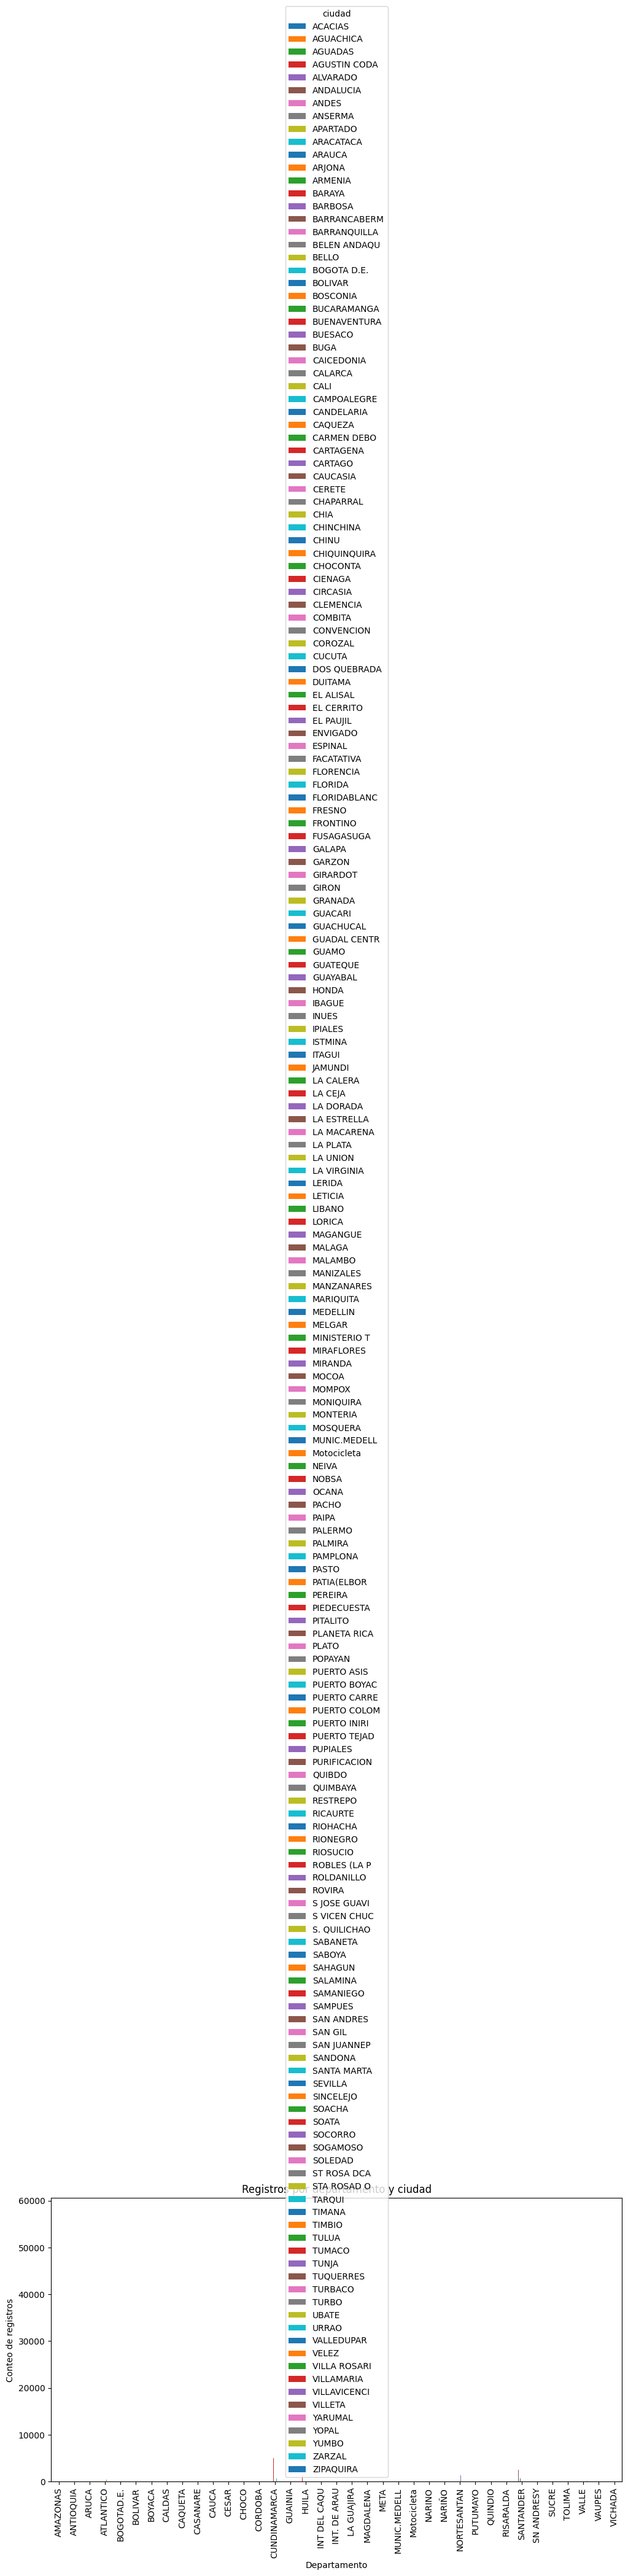


Conteo de registros por departamento y tipo de servicio:
   departamento    servicio  count
0      AMAZONAS  PARTICULAR     40
1      AMAZONAS     PUBLICO      7
2     ANTIOQUIA     OFICIAL    240
3     ANTIOQUIA  PARTICULAR  62203
4     ANTIOQUIA     PUBLICO  19481
..          ...         ...    ...
90        VALLE     OFICIAL   1225
91        VALLE  PARTICULAR  54852
92        VALLE     PUBLICO   4246
93       VAUPES     PUBLICO      1
94      VICHADA  PARTICULAR     10

[95 rows x 3 columns]


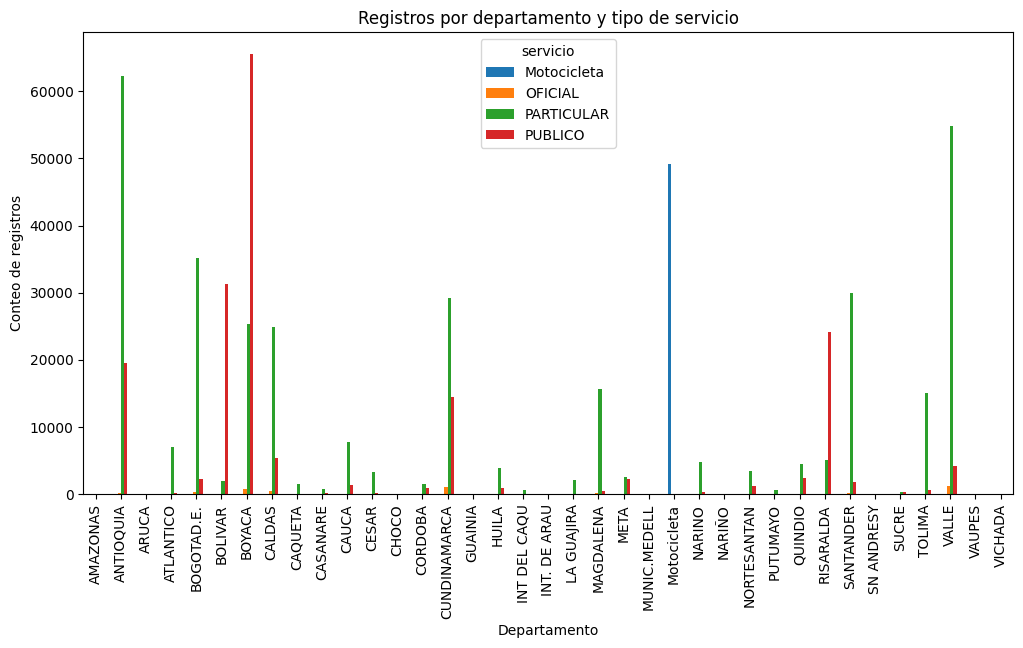


Conteo de registros por ciudad y tipo de servicio:
        ciudad    servicio  count
0      ACACIAS     OFICIAL      1
1      ACACIAS  PARTICULAR    559
2      ACACIAS     PUBLICO    457
3    AGUACHICA  PARTICULAR    744
4    AGUACHICA     PUBLICO      9
..         ...         ...    ...
476      YUMBO     PUBLICO      5
477     ZARZAL  PARTICULAR    203
478  ZIPAQUIRA     OFICIAL     37
479  ZIPAQUIRA  PARTICULAR   2779
480  ZIPAQUIRA     PUBLICO   1137

[481 rows x 3 columns]


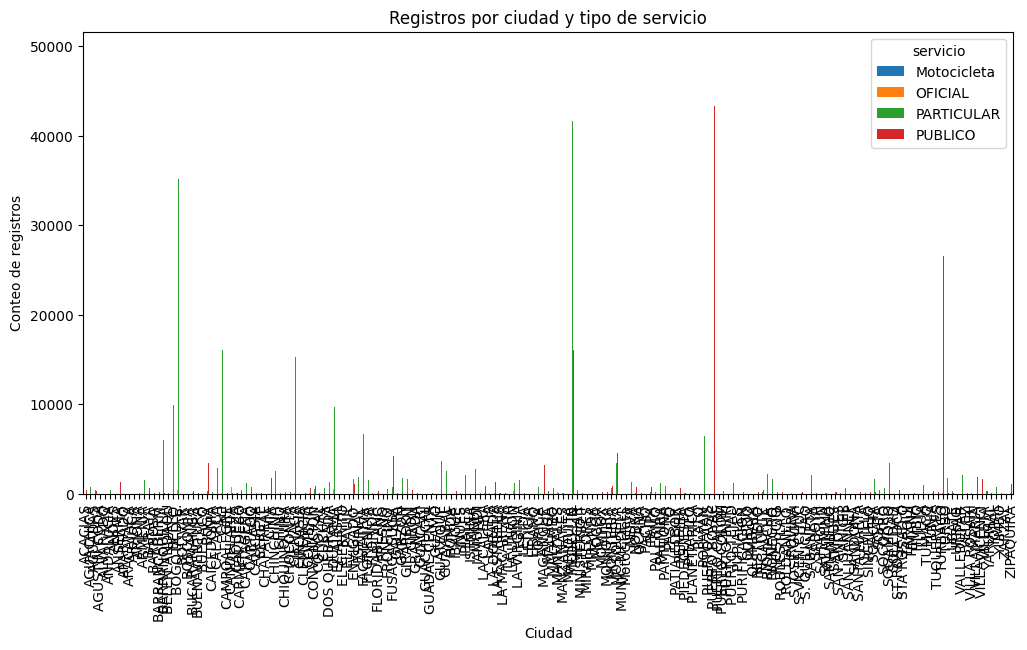


Conteo de registros por departamento, ciudad y tipo de servicio:
    departamento        ciudad    servicio  count
0       AMAZONAS       LETICIA  PARTICULAR     40
1       AMAZONAS       LETICIA     PUBLICO      7
2      ANTIOQUIA         ANDES     OFICIAL      1
3      ANTIOQUIA         ANDES  PARTICULAR     47
4      ANTIOQUIA         ANDES     PUBLICO      3
..           ...           ...         ...    ...
476        VALLE         YUMBO  PARTICULAR    126
477        VALLE         YUMBO     PUBLICO      5
478        VALLE        ZARZAL  PARTICULAR    203
479       VAUPES  S JOSE GUAVI     PUBLICO      1
480      VICHADA  PUERTO CARRE  PARTICULAR     10

[481 rows x 4 columns]

Conteo de registros por departamento y día de la semana:
    departamento  DiaSemana  count
0       AMAZONAS    domingo      9
1       AMAZONAS     jueves      6
2       AMAZONAS      lunes      7
3       AMAZONAS     martes      5
4       AMAZONAS  miércoles      9
..           ...        ...    ...
240    

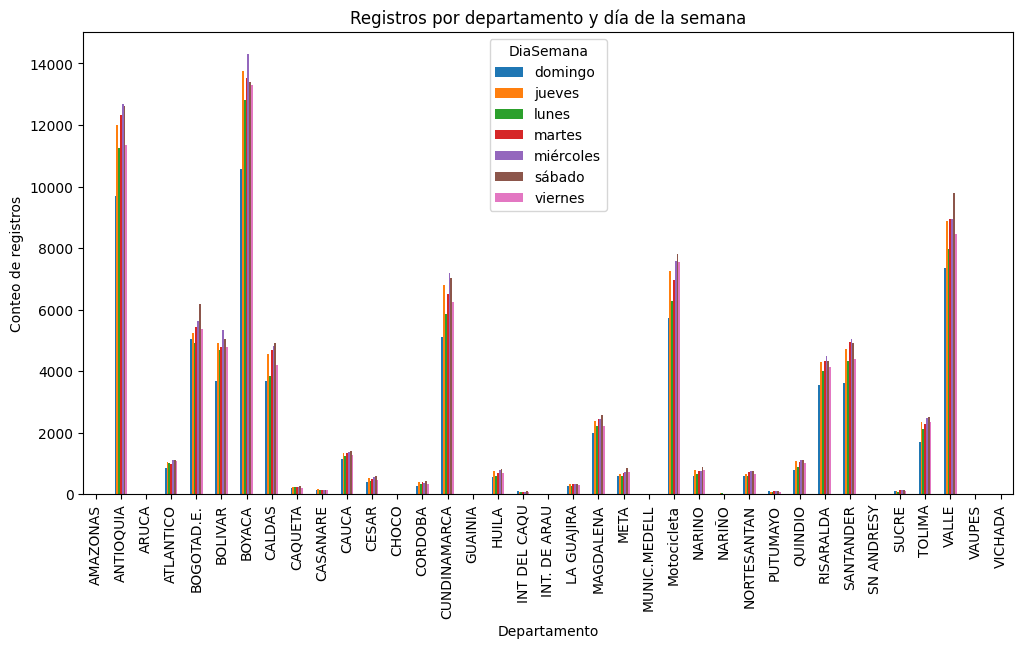


Conteo de registros por ciudad y día de la semana:
         ciudad  DiaSemana  count
0       ACACIAS    domingo    118
1       ACACIAS     jueves    121
2       ACACIAS      lunes    123
3       ACACIAS     martes    141
4       ACACIAS  miércoles    173
...         ...        ...    ...
1273  ZIPAQUIRA      lunes    501
1274  ZIPAQUIRA     martes    575
1275  ZIPAQUIRA  miércoles    674
1276  ZIPAQUIRA     sábado    653
1277  ZIPAQUIRA    viernes    570

[1278 rows x 3 columns]


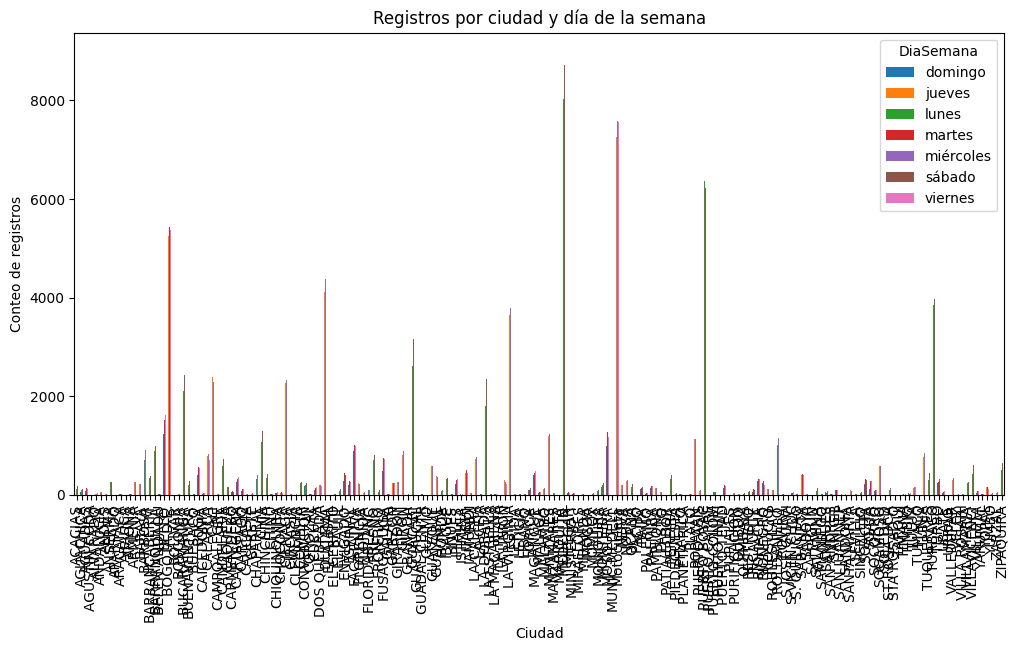


Conteo de registros por departamento y año-mes:
    departamento  Año-Mes  count
0       AMAZONAS  2023-07      3
1       AMAZONAS  2023-08      5
2       AMAZONAS  2023-09      8
3       AMAZONAS  2023-10     10
4       AMAZONAS  2023-11     17
..           ...      ...    ...
256      VICHADA  2023-08      1
257      VICHADA  2023-09      2
258      VICHADA  2023-10      1
259      VICHADA  2023-11      2
260      VICHADA  2023-12      4

[261 rows x 3 columns]


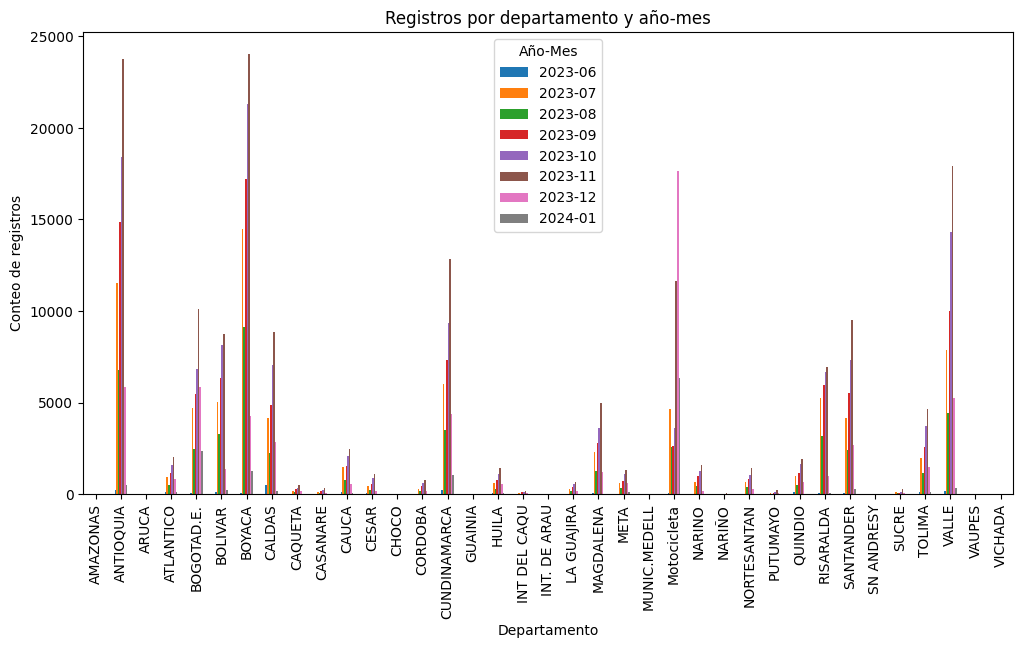


Conteo de registros por ciudad y año-mes:
         ciudad  Año-Mes  count
0       ACACIAS  2023-06      4
1       ACACIAS  2023-07    112
2       ACACIAS  2023-08     81
3       ACACIAS  2023-09    152
4       ACACIAS  2023-10    193
...         ...      ...    ...
1347  ZIPAQUIRA  2023-09    625
1348  ZIPAQUIRA  2023-10    862
1349  ZIPAQUIRA  2023-11   1173
1350  ZIPAQUIRA  2023-12    348
1351  ZIPAQUIRA  2024-01     84

[1352 rows x 3 columns]


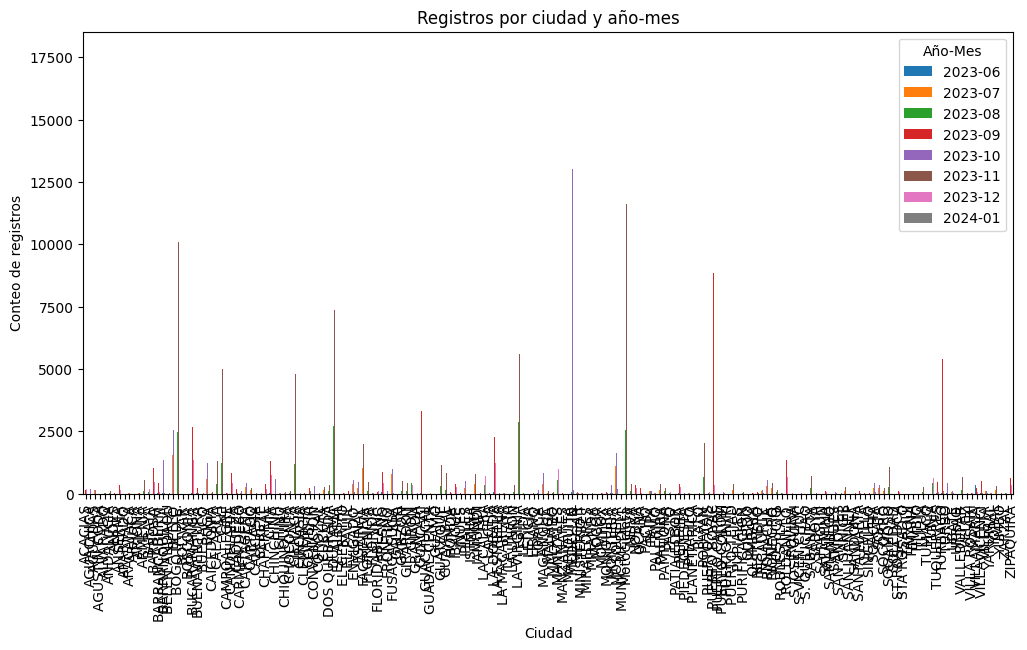


Conteo de registros por departamento y hora redondeada:
    departamento HoraRedondeada  count
0       AMAZONAS       00:00:00      1
1       AMAZONAS       05:00:00      1
2       AMAZONAS       06:00:00      2
3       AMAZONAS       07:00:00      2
4       AMAZONAS       08:00:00      1
..           ...            ...    ...
722      VICHADA       11:00:00      1
723      VICHADA       12:00:00      1
724      VICHADA       13:00:00      2
725      VICHADA       16:00:00      2
726      VICHADA       22:00:00      2

[727 rows x 3 columns]


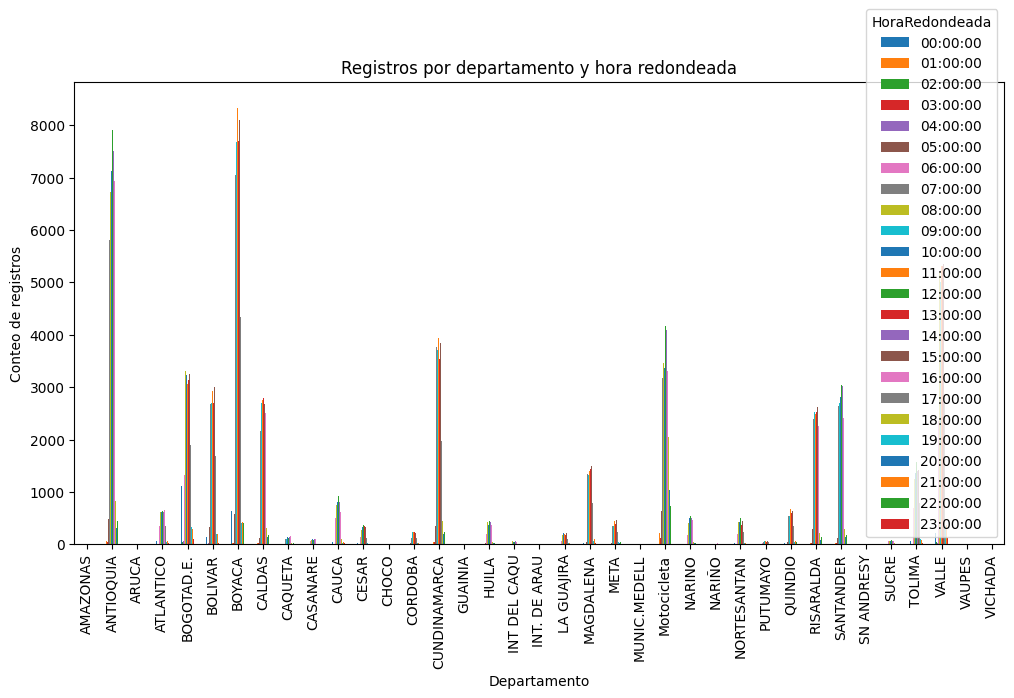


Conteo de registros por ciudad y hora redondeada:
         ciudad HoraRedondeada  count
0       ACACIAS       00:00:00     21
1       ACACIAS       01:00:00      2
2       ACACIAS       03:00:00      2
3       ACACIAS       04:00:00      1
4       ACACIAS       05:00:00      5
...         ...            ...    ...
3529  ZIPAQUIRA       19:00:00     37
3530  ZIPAQUIRA       20:00:00     12
3531  ZIPAQUIRA       21:00:00     32
3532  ZIPAQUIRA       22:00:00     17
3533  ZIPAQUIRA       23:00:00      9

[3534 rows x 3 columns]


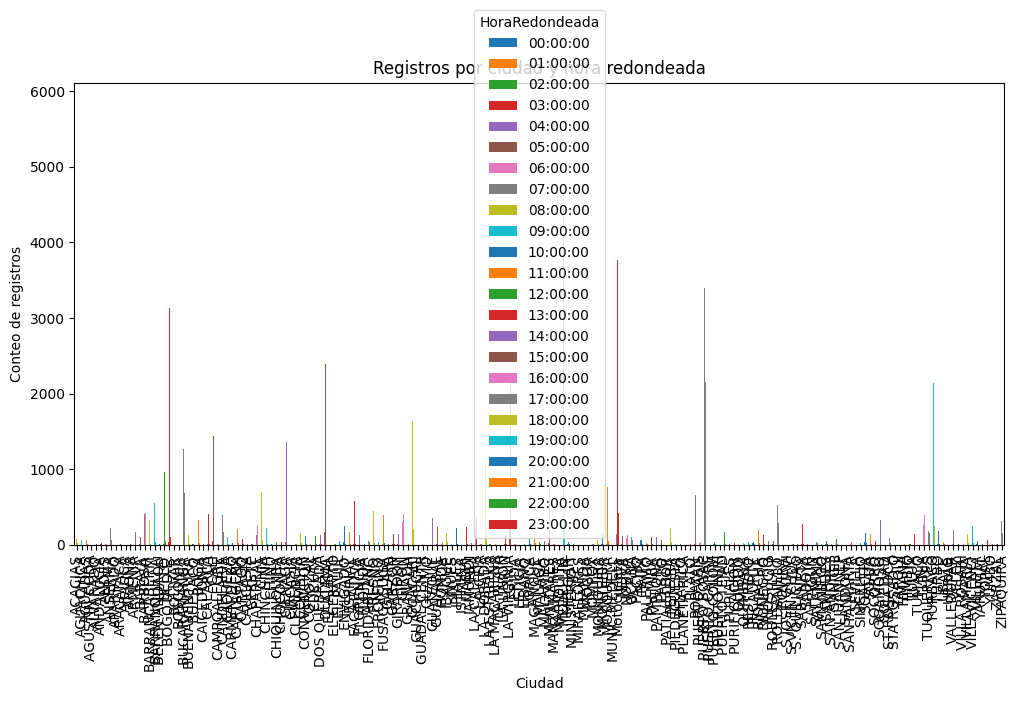


Conteo de registros por departamento, ciudad, tipo de servicio y día de la semana:
     departamento        ciudad    servicio  DiaSemana  count
0        AMAZONAS       LETICIA  PARTICULAR    domingo      8
1        AMAZONAS       LETICIA  PARTICULAR     jueves      5
2        AMAZONAS       LETICIA  PARTICULAR      lunes      6
3        AMAZONAS       LETICIA  PARTICULAR     martes      5
4        AMAZONAS       LETICIA  PARTICULAR  miércoles      6
...           ...           ...         ...        ...    ...
2773      VICHADA  PUERTO CARRE  PARTICULAR     jueves      4
2774      VICHADA  PUERTO CARRE  PARTICULAR      lunes      2
2775      VICHADA  PUERTO CARRE  PARTICULAR  miércoles      1
2776      VICHADA  PUERTO CARRE  PARTICULAR     sábado      1
2777      VICHADA  PUERTO CARRE  PARTICULAR    viernes      1

[2778 rows x 5 columns]

Conteo de registros por departamento, ciudad, tipo de servicio y año-mes:
     departamento        ciudad    servicio  Año-Mes  count
0        AMA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que los datos están en un DataFrame llamado 'data'

# Conteo total de registros
total_records = len(data)
print(f"Conteo total de registros: {total_records}")

# Conteo de registros por departamento
records_by_departamento = data['departamento'].value_counts()
print("\nConteo de registros por departamento:")
print(records_by_departamento)

# Conteo de registros por ciudad
records_by_ciudad = data['ciudad'].value_counts()
print("\nConteo de registros por ciudad:")
print(records_by_ciudad)

# Conteo de registros por tipo de servicio
records_by_servicio = data['servicio'].value_counts()
print("\nConteo de registros por tipo de servicio:")
print(records_by_servicio)

# Conteo de registros por día de la semana
records_by_dia_semana = data['DiaSemana'].value_counts()
print("\nConteo de registros por día de la semana:")
print(records_by_dia_semana)

# Conteo de registros por año-mes
records_by_anio_mes = data['Año-Mes'].value_counts()
print("\nConteo de registros por año-mes:")
print(records_by_anio_mes)

# Conteo de registros por hora redondeada
records_by_hora_redondeada = data['HoraRedondeada'].value_counts()
print("\nConteo de registros por hora redondeada:")
print(records_by_hora_redondeada)

# Conteo de registros por departamento y ciudad
records_by_departamento_ciudad = data.groupby(['departamento', 'ciudad']).size().reset_index(name='count')
print("\nConteo de registros por departamento y ciudad:")
print(records_by_departamento_ciudad)
records_by_departamento_ciudad.pivot_table(index='departamento', columns='ciudad', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por departamento y ciudad')
plt.xlabel('Departamento')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por departamento y tipo de servicio
records_by_departamento_servicio = data.groupby(['departamento', 'servicio']).size().reset_index(name='count')
print("\nConteo de registros por departamento y tipo de servicio:")
print(records_by_departamento_servicio)
records_by_departamento_servicio.pivot_table(index='departamento', columns='servicio', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por departamento y tipo de servicio')
plt.xlabel('Departamento')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por ciudad y tipo de servicio
records_by_ciudad_servicio = data.groupby(['ciudad', 'servicio']).size().reset_index(name='count')
print("\nConteo de registros por ciudad y tipo de servicio:")
print(records_by_ciudad_servicio)
records_by_ciudad_servicio.pivot_table(index='ciudad', columns='servicio', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por ciudad y tipo de servicio')
plt.xlabel('Ciudad')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por departamento, ciudad y tipo de servicio
records_by_departamento_ciudad_servicio = data.groupby(['departamento', 'ciudad', 'servicio']).size().reset_index(name='count')
print("\nConteo de registros por departamento, ciudad y tipo de servicio:")
print(records_by_departamento_ciudad_servicio)

# Conteo de registros por departamento y día de la semana
records_by_departamento_dia_semana = data.groupby(['departamento', 'DiaSemana']).size().reset_index(name='count')
print("\nConteo de registros por departamento y día de la semana:")
print(records_by_departamento_dia_semana)
records_by_departamento_dia_semana.pivot_table(index='departamento', columns='DiaSemana', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por departamento y día de la semana')
plt.xlabel('Departamento')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por ciudad y día de la semana
records_by_ciudad_dia_semana = data.groupby(['ciudad', 'DiaSemana']).size().reset_index(name='count')
print("\nConteo de registros por ciudad y día de la semana:")
print(records_by_ciudad_dia_semana)
records_by_ciudad_dia_semana.pivot_table(index='ciudad', columns='DiaSemana', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por ciudad y día de la semana')
plt.xlabel('Ciudad')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por departamento y año-mes
records_by_departamento_anio_mes = data.groupby(['departamento', 'Año-Mes']).size().reset_index(name='count')
print("\nConteo de registros por departamento y año-mes:")
print(records_by_departamento_anio_mes)
records_by_departamento_anio_mes.pivot_table(index='departamento', columns='Año-Mes', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por departamento y año-mes')
plt.xlabel('Departamento')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por ciudad y año-mes
records_by_ciudad_anio_mes = data.groupby(['ciudad', 'Año-Mes']).size().reset_index(name='count')
print("\nConteo de registros por ciudad y año-mes:")
print(records_by_ciudad_anio_mes)
records_by_ciudad_anio_mes.pivot_table(index='ciudad', columns='Año-Mes', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por ciudad y año-mes')
plt.xlabel('Ciudad')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por departamento y hora redondeada
records_by_departamento_hora_redondeada = data.groupby(['departamento', 'HoraRedondeada']).size().reset_index(name='count')
print("\nConteo de registros por departamento y hora redondeada:")
print(records_by_departamento_hora_redondeada)
records_by_departamento_hora_redondeada.pivot_table(index='departamento', columns='HoraRedondeada', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por departamento y hora redondeada')
plt.xlabel('Departamento')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por ciudad y hora redondeada
records_by_ciudad_hora_redondeada = data.groupby(['ciudad', 'HoraRedondeada']).size().reset_index(name='count')
print("\nConteo de registros por ciudad y hora redondeada:")
print(records_by_ciudad_hora_redondeada)
records_by_ciudad_hora_redondeada.pivot_table(index='ciudad', columns='HoraRedondeada', values='count', aggfunc='sum').plot(kind='bar', figsize=(12, 6))
plt.title('Registros por ciudad y hora redondeada')
plt.xlabel('Ciudad')
plt.ylabel('Conteo de registros')
plt.show()

# Conteo de registros por departamento, ciudad, tipo de servicio y día de la semana
records_by_departamento_ciudad_servicio_dia_semana = data.groupby(['departamento', 'ciudad', 'servicio', 'DiaSemana']).size().reset_index(name='count')
print("\nConteo de registros por departamento, ciudad, tipo de servicio y día de la semana:")
print(records_by_departamento_ciudad_servicio_dia_semana)

# Conteo de registros por departamento, ciudad, tipo de servicio y año-mes
records_by_departamento_ciudad_servicio_anio_mes = data.groupby(['departamento', 'ciudad', 'servicio', 'Año-Mes']).size().reset_index(name='count')
print("\nConteo de registros por departamento, ciudad, tipo de servicio y año-mes:")
print(records_by_departamento_ciudad_servicio_anio_mes)

# Conteo de registros por departamento, ciudad, tipo de servicio y hora redondeada
records_by_departamento_ciudad_servicio_hora_redondeada = data.groupby(['departamento', 'ciudad', 'servicio', 'HoraRedondeada']).size().reset_index(name='count')
print("\nConteo de registros por departamento, ciudad, tipo de servicio y hora redondeada:")
print(records_by_departamento_ciudad_servicio_hora_redondeada)



Indicadores de relación entre el tipo de servicio y el departamento:
       servicio departamento  frecuencia  proporcion_servicio  \
0   Motocicleta  Motocicleta       49140             1.000000   
1       OFICIAL    ANTIOQUIA         240             0.045802   
2       OFICIAL    ATLANTICO          34             0.006489   
3       OFICIAL   BOGOTAD.E.         394             0.075191   
4       OFICIAL      BOLIVAR          90             0.017176   
..          ...          ...         ...                  ...   
90      PUBLICO   SN ANDRESY          12             0.000067   
91      PUBLICO        SUCRE         361             0.002004   
92      PUBLICO       TOLIMA         584             0.003241   
93      PUBLICO        VALLE        4246             0.023566   
94      PUBLICO       VAUPES           1             0.000006   

    proporcion_departamento  
0                  1.000000  
1                  0.002930  
2                  0.004703  
3                  0.010414  


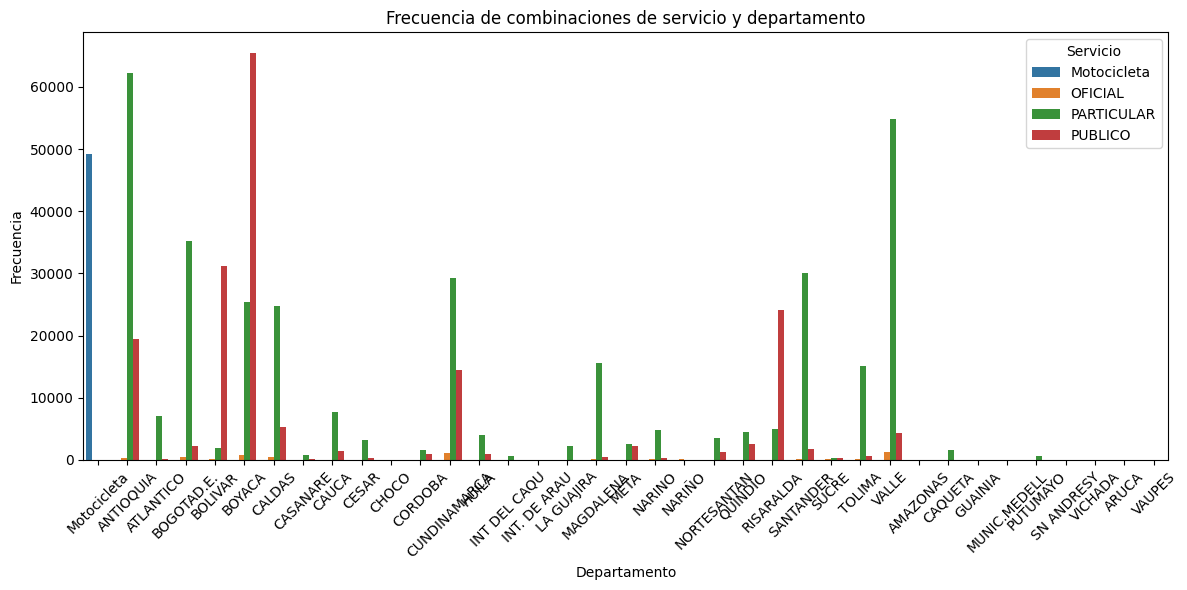

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de ocurrencia de combinaciones de variables
relacion_servicio_departamento = df.groupby(['servicio', 'departamento']).size().reset_index(name='frecuencia')

# Calcular el total de registros por tipo de servicio y por departamento
total_servicio = df['servicio'].value_counts()
total_departamento = df['departamento'].value_counts()

# Calcular la proporción de frecuencia en relación al total por tipo de servicio y por departamento
relacion_servicio_departamento['proporcion_servicio'] = relacion_servicio_departamento.apply(lambda x: x['frecuencia'] / total_servicio[x['servicio']], axis=1)
relacion_servicio_departamento['proporcion_departamento'] = relacion_servicio_departamento.apply(lambda x: x['frecuencia'] / total_departamento[x['departamento']], axis=1)

# Mostrar los resultados
print("Indicadores de relación entre el tipo de servicio y el departamento:")
print(relacion_servicio_departamento)

# Crear un gráfico de barras apiladas para visualizar la relación entre el tipo de servicio y el departamento
plt.figure(figsize=(12, 6))
sns.barplot(x='departamento', y='frecuencia', hue='servicio', data=relacion_servicio_departamento)
plt.title('Frecuencia de combinaciones de servicio y departamento')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Servicio')
plt.tight_layout()
plt.show()

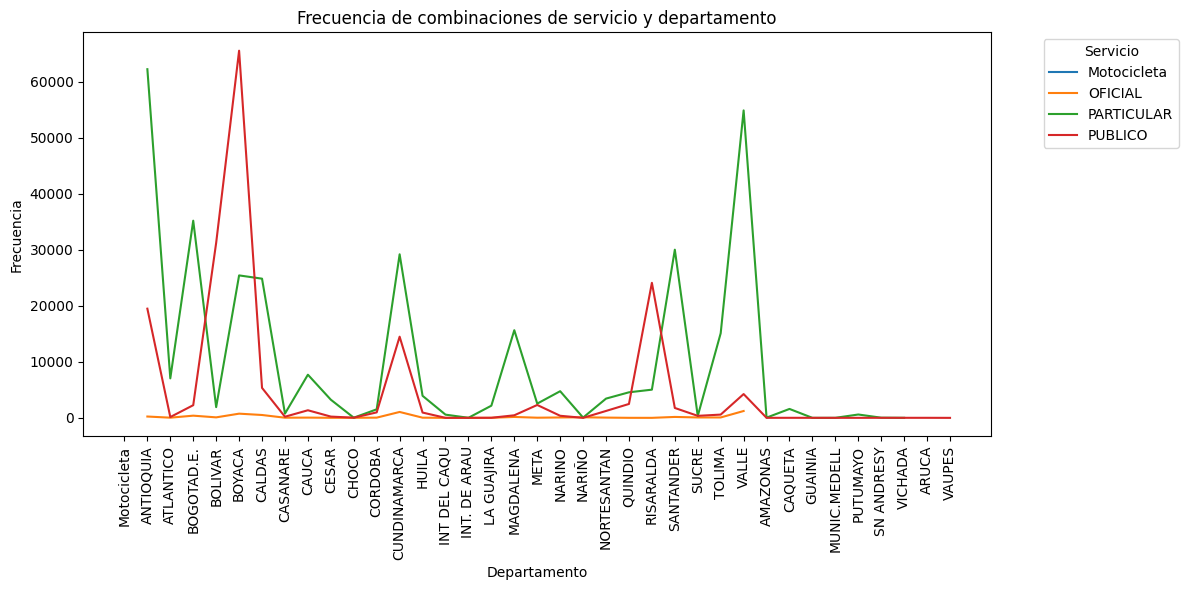

In [19]:
# Crear un gráfico de líneas para visualizar la relación entre el tipo de servicio y el departamento
plt.figure(figsize=(12, 6))
sns.lineplot(x='departamento', y='frecuencia', hue='servicio', data=relacion_servicio_departamento)
plt.title('Frecuencia de combinaciones de servicio y departamento')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.legend(title='Servicio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()